In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate,train_test_split
from sklearn import neighbors,preprocessing

Text(0.5, 1.0, '两种核函数')

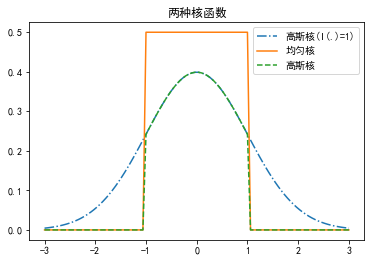

In [2]:
d=np.linspace(-3,3,100)
y1=[0.5]*100
y2=1/np.sqrt(2*np.pi)*np.exp(-d*d/2)
plt.plot(d,y2,label="高斯核(I(.)=1)",linestyle='-.')
y1,y2=np.where(d<-1,0,(y1,y2))
y1,y2=np.where(d>1,0,(y1,y2))
plt.plot(d,y1,label="均匀核",linestyle='-')
plt.plot(d,y2,label="高斯核",linestyle='--')
plt.legend()
plt.title("两种核函数")

说明：绘制均匀核函数和高斯核函数的函数曲线。利用np.where函数实现依条件的分支处理。例如，y1,y2=np.where(x<-1,0,(y1,y2))表示：若x<-1成立输出结果等于0，否则输出y1和y2。这里对np.where的结果进行元组解包依次赋值给y1和y2。

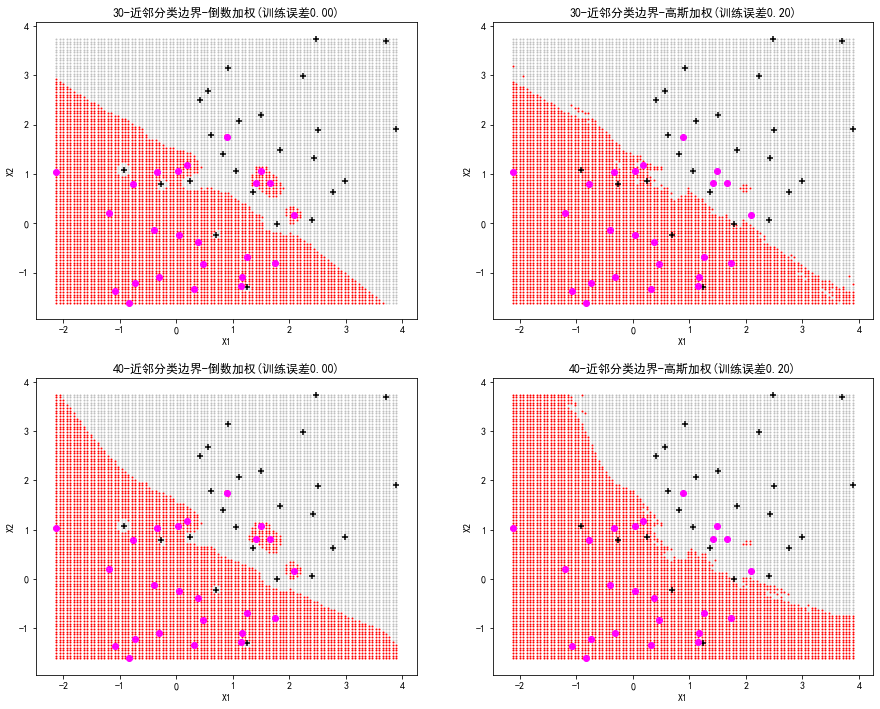

In [3]:
def guass(x):
    x=preprocessing.scale(x)
    output=1/np.sqrt(2*np.pi)*np.exp(-x*x/2)
    return output

np.random.seed(123)
N=50
n=int(0.5*N)
X=np.random.normal(0,1,size=100).reshape(N,2)
Y=[0]*n+[1]*n
X[0:n]=X[0:n]+1.5
X1,X2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),100), np.linspace(X[:,1].min(),X[:,1].max(),100))
data=np.hstack((X1.reshape(10000,1),X2.reshape(10000,1)))

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
for W,K,H,L,T in [('distance',30,0,0,'倒数加权'),(guass,30,0,1,'高斯加权'),('distance',40,1,0,'倒数加权'),(guass,40,1,1,'高斯加权')]:
    modelKNN=neighbors.KNeighborsClassifier(n_neighbors=K,weights=W)
    modelKNN.fit(X,Y)
    Yhat=modelKNN.predict(data)    
    for k,c in [(0,'silver'),(1,'red')]:
        axes[H,L].scatter(data[Yhat==k,0],data[Yhat==k,1],color=c,marker='o',s=1)
    axes[H,L].scatter(X[:n,0],X[:n,1],color='black',marker='+')
    axes[H,L].scatter(X[(n+1):N,0],X[(n+1):N,1],color='magenta',marker='o')
    axes[H,L].set_xlabel("X1")
    axes[H,L].set_ylabel("X2")
    axes[H,L].set_title("%d-近邻分类边界-%s(训练误差%.2f)"%((K,T,1-modelKNN.score(X,Y))))
plt.show()


说明：仍沿用3.4.1节的模拟数据，观察加权K-近邻法不同加权策略和参数K下的分类预测误差以及分类边界。
1、采用循环方式实现不同加权策略和参数K下的加权K-近邻。循环中的W,K,H,L,T依次表示加权策略，图形的行坐标和列坐标，以及图形标题。
2、KNeighborsClassifier中的weight参数用于指定加权策略，可选值为"distance"和"uniform",分别是倒数加权和均匀核（默认值）。此外，允许指定weight参数为一个用户自定义函数。因KNeighborsClassifier没有提供高斯核函数，所以采用自定义函数方式实现。
3、def guass(x)表示定义名为guass的用户自定义函数。首先对距离进行标准化处理，然后计算相应的高斯密度函数值。这里指定高斯核函数中的示性函数I()等于1。
4、本例中，加权K-近邻法的训练误差低于普通K-近邻法。